In [2]:
import geopandas
import pandas

# Pour recharger automatiquement le code externe au notebook
from matplotlib.pyplot import legend

from communs.chargeur_geometries import _charger_geometries_territoire_cible
from communs.crater_logger import log
%load_ext autoreload
%autoreload 2

pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 5)

In [3]:
from communs.chargeur_geometries import CHEMIN_FICHIER_GEOMETRIES_COMMUNES, CHEMIN_FICHIER_GEOMETRIES_DEPARTEMENTS, \
    CHEMIN_FICHIER_GEOMETRIES_EPCIS, CHEMIN_FICHIER_GEOMETRIES_REGIONS, CHEMIN_FICHIER_REFERENTIEL_TERRITOIRES

log.info(f"  - Chargement geometries")

gdf_epci = _charger_geometries_territoire_cible("P-FR", "EPCI",
                                                       CHEMIN_FICHIER_GEOMETRIES_COMMUNES,
                                                       CHEMIN_FICHIER_GEOMETRIES_DEPARTEMENTS,
                                                       CHEMIN_FICHIER_GEOMETRIES_EPCIS,
                                                       CHEMIN_FICHIER_GEOMETRIES_REGIONS,
                                                       CHEMIN_FICHIER_REFERENTIEL_TERRITOIRES)
gdf_communes = _charger_geometries_territoire_cible("P-FR", "COMMUNE",
                                                       CHEMIN_FICHIER_GEOMETRIES_COMMUNES,
                                                       CHEMIN_FICHIER_GEOMETRIES_DEPARTEMENTS,
                                                       CHEMIN_FICHIER_GEOMETRIES_EPCIS,
                                                       CHEMIN_FICHIER_GEOMETRIES_REGIONS,
                                                       CHEMIN_FICHIER_REFERENTIEL_TERRITOIRES)

2022-02-07 10:38:41,192 — crater_data — INFO — [MainProcess] :   - Chargement geometries
2022-02-07 10:38:54,121 — crater_data — INFO — [MainProcess] :   - Chargement referentiel territoires
2022-02-07 10:39:06,402 — crater_data — INFO — [MainProcess] :   - Chargement referentiel territoires


In [8]:
log.info(f"  - Chargement donnees indicateurs")
df_tous_sauf_autre = pandas.read_csv('./donnees_crater/intrants_agricoles_tous_sauf_autre/intrants_agricoles.csv', sep=";")
df_2019_tous_sauf_autre = df_tous_sauf_autre.loc[df_tous_sauf_autre.annee_achat == 2019, :]
df_cmr = pandas.read_csv('./donnees_crater/intrants_agricoles_cmr/intrants_agricoles.csv', sep=";")
df_2019_cmr = df_cmr.loc[df_cmr.annee_achat == 2019, :]
gdf_epcis_tous_sauf_autre = gdf_epci.merge(df_tous_sauf_autre, on='id_territoire', how='left')
gdf_communes_cmr = gdf_communes.merge(df_2019_cmr, on='id_territoire', how='left')
gdf_communes_tous_sauf_autre = gdf_communes.merge(df_tous_sauf_autre, on='id_territoire', how='left')

2022-02-07 10:46:51,025 — crater_data — INFO — [MainProcess] :   - Chargement donnees indicateurs


<AxesSubplot:>

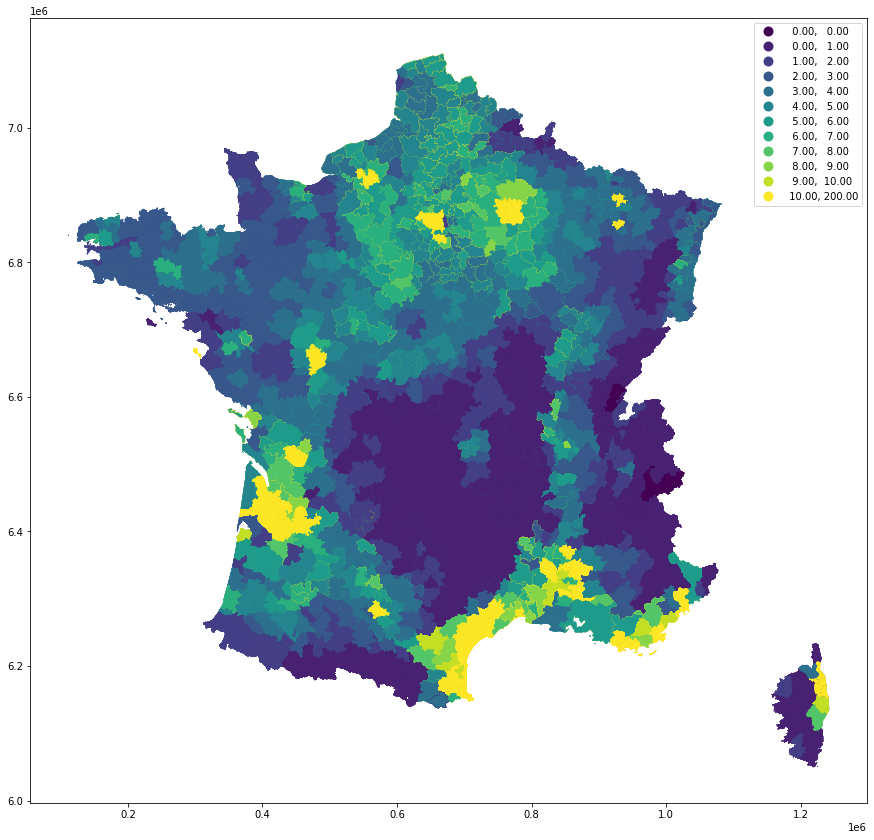

In [12]:
gdf_epcis_tous_sauf_autre.plot(column='NODU_normalise', legend=True, scheme="User_Defined", classification_kwds=dict(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 200]), figsize=(15, 15))

/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/mapclassify/classifiers.py:882: RuntimeWarning: invalid value encountered in subtract
  ycd = np.abs(yc - yc_med)


<AxesSubplot:>

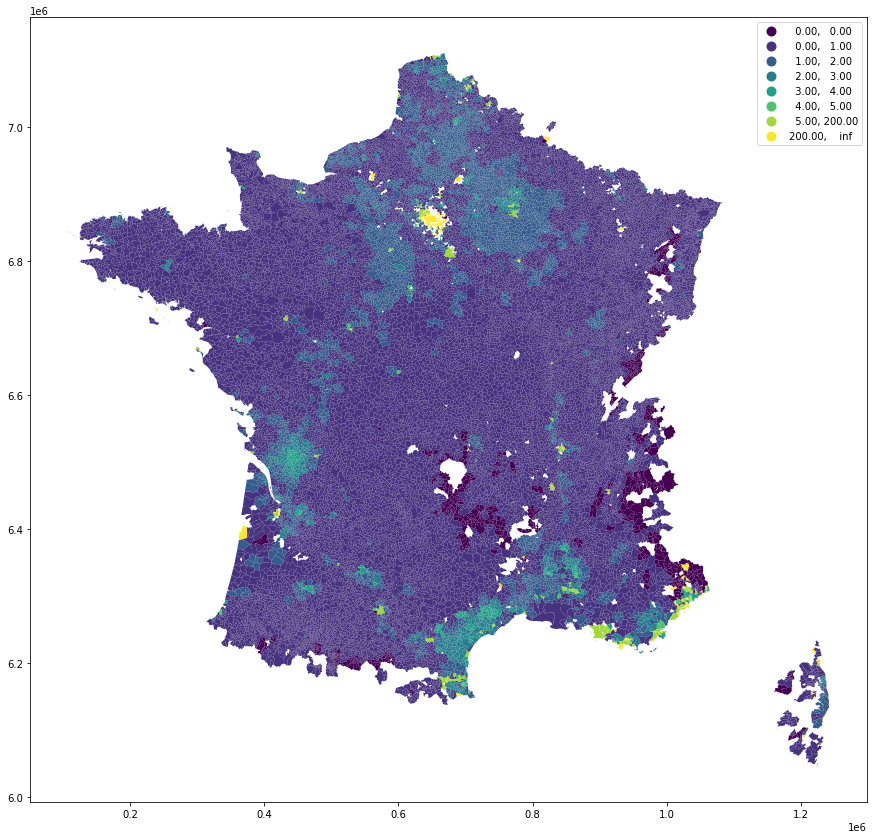

In [23]:
gdf_communes_cmr.plot(column='NODU_normalise', legend=True, scheme="User_Defined", classification_kwds=dict(bins=[0, 1, 2, 3, 4, 5, 200]), figsize=(15, 15))

In [ ]:
gdf_communes_tous_sauf_autre.plot(column='NODU_normalise', legend=True, scheme="User_Defined", classification_kwds=dict(bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 200]), figsize=(15, 15))

In [ ]:
gdf_communes_tous_sauf_autre.explore(column='NODU_normalise', cmap='Accent',tooltip=False, popup=True)

/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/branca/colormap.py:375: RuntimeWarning: invalid value encountered in double_scalars
  self.index = [vmin + (vmax-vmin)*i*1./n for i in range(n+1)]
